## An analysis of Airline crashes from 1908 
#### The purpose of this program is to analyse trends and patterns of air disaster over a 100 year period.


Dataset:  https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

#### Analysis Info:
- Examining dataset
- Preprocessing Data
- Separating the dataset into military and commercial flights
- Analyzing Trends and useful information such as Airline with most crashes, General Trend of crash frequency over the last 100 years, crash frequency of major air crashes(high fatalities)  



In [1]:
import pandas as pd

df = pd.read_csv('Airplane_since_1908.csv', parse_dates=True, index_col='Date')

print('dataframe head: ' , '\n' , df.head()  , '\n' )

print('dataframe info: ' , '\n', df.info())

dataframe head:  
              Time                            Location                Operator  \
Date                                                                            
1908-09-17  17:18                 Fort Myer, Virginia    Military - U.S. Army   
1909-09-07    NaN             Juvisy-sur-Orge, France                     NaN   
1912-07-12  06:30           Atlantic City, New Jersey    Military - U.S. Navy   
1913-08-06    NaN  Victoria, British Columbia, Canada                 Private   
1913-09-09  18:30                  Over the North Sea  Military - German Navy   

           Flight #          Route                 AC Type Registration cn/ln  \
Date                                                                            
1908-09-17      NaN  Demonstration        Wright Flyer III          NaN     1   
1909-09-07      NaN       Air show          Wright Byplane          SC1   NaN   
1912-07-12      NaN    Test flight               Dirigible          NaN   NaN   
1913-08-

In [2]:
#lets drop all columns that are unnecessary for out investigation
#We can also see that flight column has almost 3/4 of the entries missing so it wont be useful for our analysis 
df = df.drop(['Summary', 'cn/ln', 'Registration'], axis =1) 


#We see that there are still missing values in our data. We can simply delete all entries with missing values and 
#if the shape of our data changes much. We saw that the size of our data almost halved this way. 4967 to 3166

#For the purpose of this project filling the values with 0 seems to be the most logical step 

#print(df.shape)

#df = df.fillna(0)

print(df.shape)

#df.head()


(4967, 13)


In [3]:
#DATA CLEANING STAGE AND IMPUTATION
#First we drop all entries that has operator missing
df = df.dropna(subset=['Operator'])

df = df.drop_duplicates()

df = df.dropna(thresh=8, axis =0)  # remove all rows if non-null values are less than 8

df.info()
# we can see that we have lost around 200 entries. That is fine because most of the lost entries had hardly any info

'''
Next we fill in the missing numeric values with median for the respective years
by_year_class = df.groupby(df.index.year)

#function to impute median
def impute_median(series):
    return series.fillna(series.median())

#imputing fatalities column with median for that year

df['Fatalities'] = by_year_class['Fatalities'].transform(impute_median)
'''

#write the processed dataset into a csv file
df.to_csv('airplance_since_1908_processed.csv')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4755 entries, 1908-09-17 to 2019-07-30
Data columns (total 13 columns):
Time                     3414 non-null object
Location                 4751 non-null object
Operator                 4755 non-null object
Flight #                 1314 non-null object
Route                    4149 non-null object
AC Type                  4752 non-null object
Aboard                   4753 non-null float64
Aboard Passangers        4728 non-null float64
Aboard Crew              4731 non-null float64
Fatalities               4755 non-null float64
Fatalities Passangers    4714 non-null float64
Fatalities Crew          4716 non-null float64
Ground                   4732 non-null float64
dtypes: float64(7), object(6)
memory usage: 520.1+ KB


In [4]:
#We separate commercial and military airplane entries. We assumme the data set has the word military in the operator column for every military aircraft entry. To do this we must remove entries with null values in the operator col




filter = df['Operator'].str.contains('Military') 

df_mil = df[filter]

df_mil.to_csv('airline_military.csv')

print(df_mil.info() , '\n')

df_com = df[~filter]

print(df_com.info())

df_com.to_csv('airline_commercial.csv')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 641 entries, 1908-09-17 to 2019-07-30
Data columns (total 13 columns):
Time                     470 non-null object
Location                 641 non-null object
Operator                 641 non-null object
Flight #                 38 non-null object
Route                    491 non-null object
AC Type                  641 non-null object
Aboard                   641 non-null float64
Aboard Passangers        626 non-null float64
Aboard Crew              629 non-null float64
Fatalities               641 non-null float64
Fatalities Passangers    615 non-null float64
Fatalities Crew          619 non-null float64
Ground                   640 non-null float64
dtypes: float64(7), object(6)
memory usage: 70.1+ KB
None 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4114 entries, 1913-08-06 to 2019-05-05
Data columns (total 13 columns):
Time                     2944 non-null object
Location                 4110 non-null object
Operator

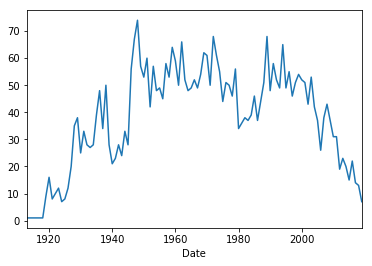

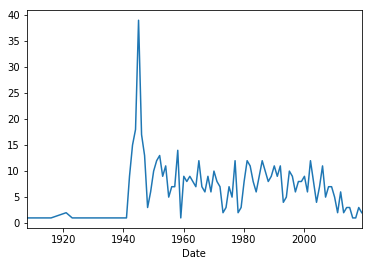

In [5]:
#COMMERCIAL vs MILITARY : analyzing number of crashes(ALL incidents) over the years 

import matplotlib.pyplot as plt

df_com_yearly = df_com.groupby(df_com.index.year)['Fatalities'].count() #returns a series

df_com_yearly.plot()
plt.show()

df_mil_yearly = df_mil.groupby(df_mil.index.year)['Fatalities'].count() #returns a series
df_mil_yearly.plot()
plt.show()



In [6]:
#COMMERCIAL 
#groupby operators OF flight and summing their total fatalities

df_com_grouped = df_com.groupby('Operator')['Fatalities'].sum()

print(df_com_grouped.head())


#printing max and sum
print(df_com.groupby('Operator')['Fatalities'].agg(['max','sum']).head())

#printing total number of incidents per airline
print('\n Total number of crashes per airline (top 10)', 
      df_com.groupby('Operator')['Fatalities'].count().sort_values(ascending=False).head(10))

Operator
\tAerolineas Flecha Austral - ALFA     4.0
\tAmazonavesAir Taxi                   7.0
\tCHC Helikopter Service              13.0
\tLoide Aéreo Nacional                10.0
 Airlines  PNG                        13.0
Name: Fatalities, dtype: float64
                                     max   sum
Operator                                      
\tAerolineas Flecha Austral - ALFA   4.0   4.0
\tAmazonavesAir Taxi                 7.0   7.0
\tCHC Helikopter Service            13.0  13.0
\tLoide Aéreo Nacional              10.0  10.0
 Airlines  PNG                      13.0  13.0

 Total number of crashes per airline (top 10) Operator
Aeroflot                               250
Air France                              66
Deutsche Lufthansa                      63
United Air Lines                        44
Pan American World Airways              41
China National Aviation Corporation     37
American Airlines                       37
KLM Royal Dutch Airlines                34
Indian Airline

In [7]:
#COMMERCIAL 
#detecting outliers using z score

from scipy.stats import zscore

standardized = df_com.groupby('Operator')['Fatalities'].transform(zscore)

print(standardized.head())


C:\Users\Radeeb. J.B\Anaconda3\lib\site-packages\scipy\stats\stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Date
1913-08-06   -1.129490
1918-12-16   -0.244137
1919-05-25   -0.244137
1919-07-19   -0.244137
1919-07-21         NaN
Name: Fatalities, dtype: float64


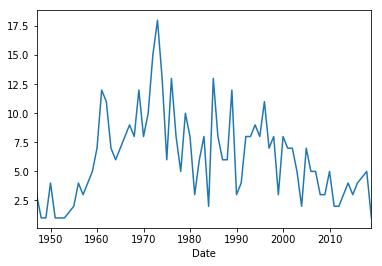

In [8]:
#find major air disasters in commercial airlines (more than 50 fatalities)

df_com_major = df_com.loc[df_com['Fatalities'] > 50]

df_com_major_yearly = df_com_major.groupby(df_com_major.index.year)['Fatalities'].count() #returns a series

df_com_major_yearly.plot()
plt.show()


#print(df_com_major.head())
